In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.read_csv('cars.csv', index_col='Unnamed: 0')
df

speed  dist
1       4     2
2       4    10
3       7     4
4       7    22
5       8    16
6       9    10
7      10    18
8      10    26
9      10    34
10     11    17
11     11    28
12     12    14
13     12    20
14     12    24
15     12    28
16     13    26
17     13    34
18     13    34
19     13    46
20     14    26
21     14    36
22     14    60
23     14    80
24     15    20
25     15    26
26     15    54
27     16    32
28     16    40
29     17    32
30     17    40
31     17    50
32     18    42
33     18    56
34     18    76
35     18    84
36     19    36
37     19    46
38     19    68
39     20    32
40     20    48
41     20    52
42     20    56
43     20    64
44     22    66
45     23    54
46     24    70
47     24    92
48     24    93
49     24   120
50     25    85

In [7]:
df.corr()

speed      dist
speed  1.000000  0.806895
dist   0.806895  1.000000

In [ ]:
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

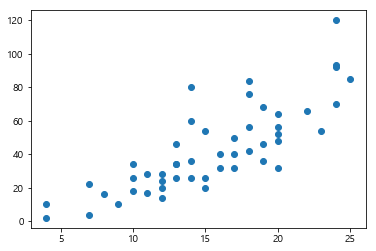

In [10]:
plt.scatter( df.speed, df.dist) #df['speed']
plt.show()

In [11]:
#귀무가설: 속도와 거리간에 연관성이 없다
#대립가설:있다
result = stats.linregress( df.speed, df.dist )
result
print("기울기", result.slope)
print("절편:", result.intercept )
print("상관계수:", result.rvalue)
print("p-value:", result.pvalue) 
print("편차:", result.stderr) 
#0.1(귀무10, 대립채택 90)
#0.05(귀무5, 대립가설 95)
#0.001(귀무1, 대립가설 99)

기울기 3.9324087591240864
절편: -17.579094890510937
상관계수: 0.8068949006892102
p-value: 1.4898364962951247e-12
편차: 0.41551277665712255


In [13]:
df['lm']=  df['speed']*result.slope +result.intercept
# y = x*result.slope +result.intercept 

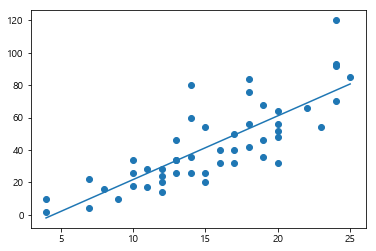

In [14]:
plt.scatter( df.speed, df.dist) #df['speed']
plt.plot( df.speed, df['lm'])
plt.show()

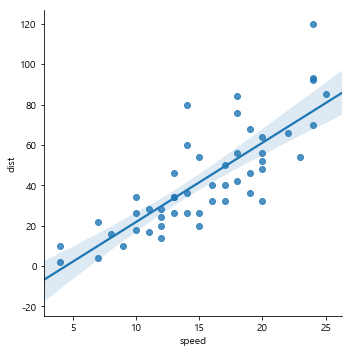

In [16]:
sns.lmplot( x='speed',y='dist', data=df)
plt.show()

In [18]:
# model = sm.OLS.from_formula( 'dist~speed+oil',df)
model = sm.OLS.from_formula( 'dist~speed',df)
result = model.fit() #training...
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           1.49e-12
Time:                        15:52:28   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result.params

Intercept   -17.579095
speed         3.932409
dtype: float64

In [20]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  